# Week 4
Design and implement an Image classification model to classify a dataset of images using Deep Feed Forward NN. Record the accuracy corresponding to the number of epochs. Use the MNIST datasets.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


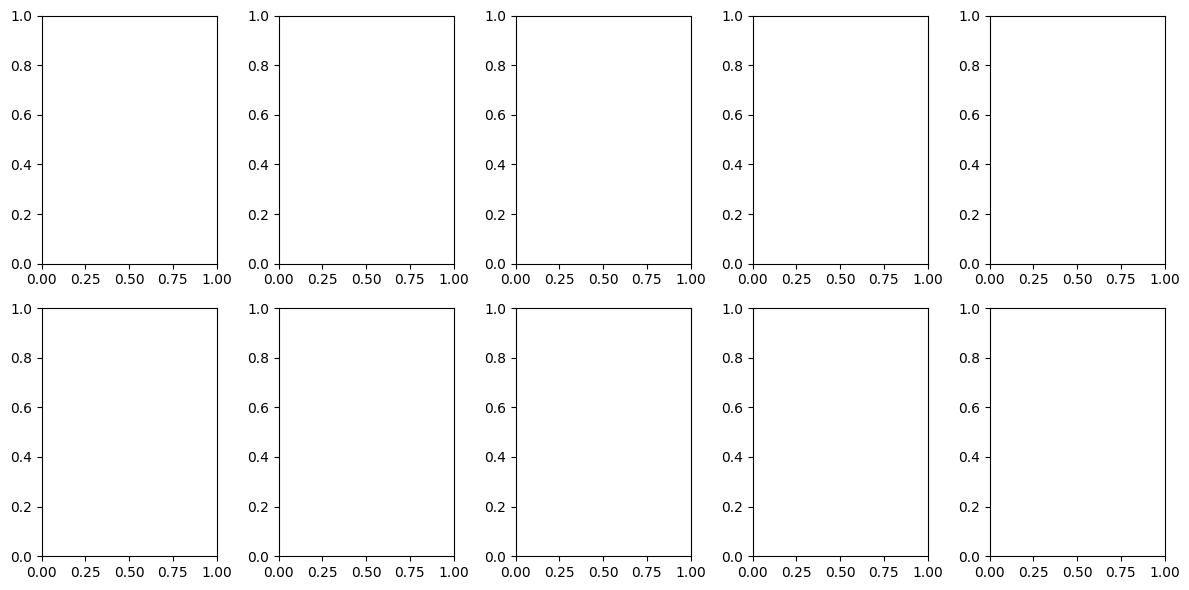

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True,
                        figsize=(12, 6), facecolor='white')

In [ ]:
n = 0
for i in range(0, 2):
    for j in range(0, 5):
        axs[i, j].matshow(X_train[n])
        axs[i, j].set(title=y_train[n])
        n = n+1
plt.show()

In [6]:
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [ ]:
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-1',
          kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2',
          kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3',
          kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=5,
          verbose=1,  validation_split=0.2,   shuffle=True)

Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8806 - loss: 0.3946 - val_accuracy: 0.9593 - val_loss: 0.1350
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9634 - loss: 0.1180 - val_accuracy: 0.9563 - val_loss: 0.1517
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9743 - loss: 0.0822 - val_accuracy: 0.9697 - val_loss: 0.1060
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9806 - loss: 0.0628 - val_accuracy: 0.9722 - val_loss: 0.1081
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9835 - loss: 0.0520 - val_accuracy: 0.9716 - val_loss: 0.1032


In [ ]:
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))
model.summary()
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")
print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data ----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       1.00      0.99      0.99      6742
           2       0.99      0.97      0.98      5958
           3       0.97      0.99      0.98      6131
           4       0.99      0.98      0.99      5842
           5       0.98      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.99      0.97      0.98      5851
           9       0.96      0.99      0.98      5949

    accuracy                           0.98     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.98      0.98     60000


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99 